In [73]:
import xml.etree.ElementTree as ET
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.cm as cm

file = ET.parse('C:/Users/Felix/Desktop/Máster  BD Deporte/Módulo 7 - Proveedores de Datos Deportivos/Liga Primera 23/f71/f71-23-2022-2301587-defcoverage.xml')

In [61]:
import pandas as pd

# Initialize data containers
data = []

# Iterate through XML tree
for game in file.getroot():
    home_team = game.attrib.get("home_team_name")
    away_team = game.attrib.get("away_team_name")

    for team in game:
        team_name = home_team if team.attrib.get("Side") == "Home" else away_team

        for player in team:
            player_name = player.attrib.get("player_name")

            for stat in player:
                stat_name = stat.tag
                coords = [[point.attrib.get("x"), point.attrib.get("y")] for point in stat]

                num_events = len(coords) if stat_name != "DefensiveCoverage" else None

                data.append([team_name, player_name, stat_name, num_events, coords])

# Create DataFrame
df = pd.DataFrame(data, columns=[
    "Team", "Player", "Defensive Stat", "Number of Defensive Actions", "Coords of Defensive Actions"
])


In [62]:
df

,Team,Player,Defensive Stat,Number of Defensive Actions,Coords of Defensive Actions
0,Athletic Club,Dani Vivian,DefensiveCoverage,NaN,"[[21.0, 4.5], [11.8, 12.2], [11.3, 56.9], [21...."
1,Athletic Club,Dani Vivian,Tackles,1.0,"[[21.0, 4.5]]"
2,Athletic Club,Dani Vivian,Interceptions,1.0,"[[66.0, 42.9]]"
3,Athletic Club,Dani Vivian,Clearances,3.0,"[[11.3, 56.9], [5.9, 55.4], [11.8, 12.2]]"
4,Athletic Club,Yuri Berchiche,DefensiveCoverage,NaN,"[[15.6, 51.2], [9.3, 55.5], [30.4, 89.2], [32...."
...,...,...,...,...,...
76,Mallorca,Iddrisu Baba,Clearances,1.0,"[[15.4, 36.2]]"
77,Mallorca,Lago Junior,FoulsConceded,1.0,"[[30.6, 95.9]]"
78,Mallorca,Antonio Sánchez,DefensiveCoverage,NaN,"[[30, 8.1], [19.2, 16.4], [25, 41.6], [30, 8.1]]"
79,Mallorca,Antonio Sánchez,Tackles,1.0,"[[25, 41.6]]"


In [65]:
def opta_pitch(ax):        
    # OPTA PITCH
    # Pitch Outline & Centre Line
    plt.plot([0,0],[0,100], color="black")
    plt.plot([0,100],[100,100], color="black") #upper line x_start x_end y_start y_end
    plt.plot([100,100],[100,0], color="black")
    plt.plot([100,0],[0,0], color="black")
    plt.plot([50,50],[0,100], color="black")

    # Left Penalty Area
    plt.plot([17,17],[78.9,21.1],color="black")
    plt.plot([0,17],[78.9,78.9],color="black")
    plt.plot([17,0],[21.1,21.1],color="black")

    # Right Penalty Area
    plt.plot([100,83],[78.9,78.9],color="black")
    plt.plot([83,83],[78.9,21.1],color="black")
    plt.plot([83,100],[21.1,21.1],color="black")

    # Left 6-yard Box
    plt.plot([0,5.8],[63.2,63.2],color="black")
    plt.plot([5.8,5.8],[63.2,36.8],color="black")
    plt.plot([5.8,0],[36.8,36.8],color="black")

    # Right 6-yard Box
    plt.plot([100,94.2],[63.2,63.2],color="black")
    plt.plot([94.2,94.2],[63.2,36.8],color="black")
    plt.plot([94.2,100],[36.8,36.8],color="black")

    # Prepare Circles OK
    centreCircle = plt.Circle((50,50),9.15,color="black",fill=False)
    centreSpot = plt.Circle((50,50),0.6,color="black")
    leftPenSpot = plt.Circle((11.5,50),0.6,color="black")
    rightPenSpot = plt.Circle((88.5,50),0.6,color="black")

    # Draw Circles
    ax.add_patch(centreCircle)
    ax.add_patch(centreSpot)
    ax.add_patch(leftPenSpot)
    ax.add_patch(rightPenSpot)

    # Prepare Arcs based on penalty Spots
    leftArc = patches.Arc((11.5,50),height=18.3,width=18.3,angle=0,
                theta1=310,theta2=50,color="black")
    rightArc = patches.Arc((88.5,50),height=18.3,width=18.3,angle=0,theta1=130,theta2=230,color="black")


    # Draw Arcs
    ax.add_patch(leftArc)
    ax.add_patch(rightArc)

In [66]:
filtered_df=df[(df["Team"]=="Athletic Club") & (df["Defensive Stat"]=="DefensiveCoverage")]
test=filtered_df[["Player","Coords of Defensive Actions"]]
test.reset_index(inplace=True, drop=True)

C:\Users\Felix\AppData\Local\Temp\ipykernel_17252\2963289875.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap('tab10', len(test))  # 'tab10' has distinct colors


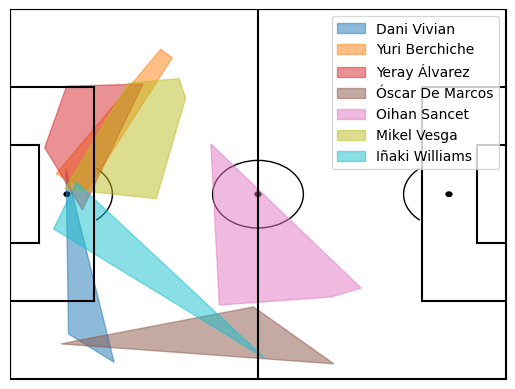

In [75]:
# Generate a color map
colors = cm.get_cmap('tab10', len(test))  # 'tab10' has distinct colors

fig, ax = plt.subplots()


opta_pitch(ax)

ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

for i in range(len(test)):
    rect1 = patches.Polygon(test.iloc[i,1], label=test.iloc[i,0], linewidth=1,edgecolor=colors(i), facecolor=colors(i), alpha=0.5)

    ax.add_patch(rect1)


# text1=ax.text(10,80, f"{team_0}\nmean poss:\n {round(np.mean(l1),2)}%")
# text2=ax.text(80,80, f"{team_1}\nmean poss:\n {round(np.mean(l2),2)}%")

# if "middle" in df.index.tolist():
#     text3=ax.text(52,80, f"Middle\nmean poss:\n {round(np.mean(l3),2)}%")

# plt.title("Mean possesion of the match")

ax.set( xlim=[0, 100], ylim=[0, 100])
ax.legend()